# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
dicionario_sexo = {0: "masculino", 1: "feminino"}
df['sex'] = df['sex'].map(dicionario_sexo)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,feminino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,feminino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,feminino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,feminino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,masculino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,feminino,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,feminino,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,feminino,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,masculino,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [28]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab_sex['probabilidade'] = tab_sex[1]/tab_sex['All']
tab_sex['odds'] = tab_sex[1]/tab_sex[0]

# aqui tivemos que deixas a variavel indice como categorica para aplicar aa função.
tab_sex['odds_vs_all'] = tab_sex['odds']/tab_sex.loc['All','odds']
tab_sex['log_odds'] = np.log(tab_sex['odds'])
tab_sex['WOE'] = np.log(tab_sex['odds_vs_all'])
tab_sex

flag_doente,0,1,All,probabilidade,odds,odds_vs_all,log_odds,WOE
sex,,,,,,,,
feminino,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
masculino,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [29]:
# Crie categorias de idade usando qcut
df['age_cat'] = pd.qcut(df['age'], q=5, labels=['Menor de 20%', 'De 20% a 40%', 'De 40% a 60%','De 60% a 80%', 'Mais de 80%'])

In [30]:

tab_age = pd.crosstab(df['age_cat'], df['flag_doente'], margins= True)
tab_age['probabilidade'] = tab_age[1]/tab_age['All']
tab_age['odds'] = tab_age[1]/tab_age[0]

# aqui tivemos que deixas a variavel indice como categorica para aplicar aa função.
tab_age['odds_vs_all'] = tab_age['odds']/tab_age.loc['All','odds']
tab_age['log_odds'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_vs_all'])
tab_age

flag_doente,0,1,All,probabilidade,odds,odds_vs_all,log_odds,WOE
age_cat,,,,,,,,
Menor de 20%,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
De 20% a 40%,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
De 40% a 60%,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
De 60% a 80%,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
Mais de 80%,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

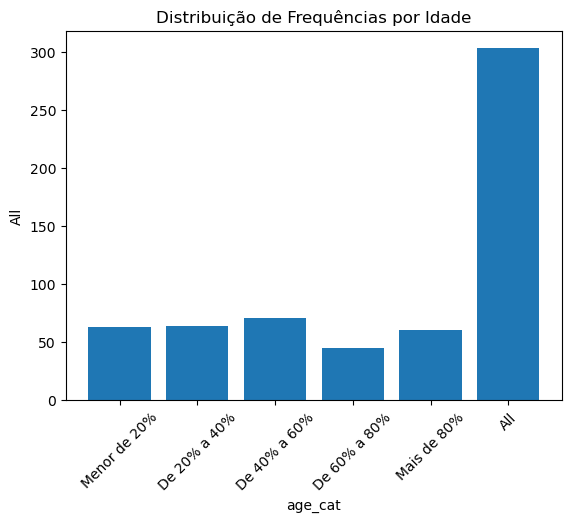

In [45]:
# Crie a figura e o eixo
fig, ax = plt.subplots()

# Defina a variável a ser utilizada no eixo x (categórica)
var_x = 'age_cat'

# Defina a variável a ser utilizada no eixo y (numérica)
var_y = 'All'  # Para contagens ou 'probabilidade' para probabilidades

# Obtenha os dados para o gráfico
dados_x = tab_age.index.to_numpy()
dados_y = tab_age[var_y].to_numpy()

# Crie o gráfico de barras
ax.bar(dados_x, dados_y)

# Defina os rótulos dos eixos
plt.xlabel(var_x)
plt.ylabel(var_y)

# Defina o título do gráfico
plt.title('Distribuição de Frequências por Idade')

# Gire os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)

# Mostre o gráfico
plt.show()

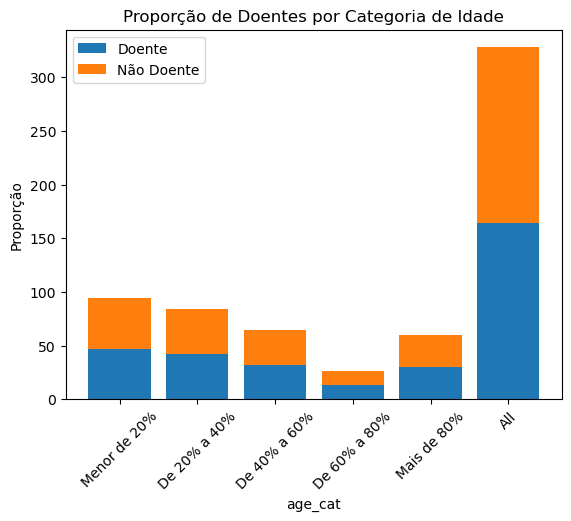

In [44]:
# Crie a figura e o eixo
fig, ax = plt.subplots()

# Defina a variável a ser utilizada no eixo x (categórica)
var_x = 'age_cat'

# Obtenha os dados para o gráfico
dados_x = tab_age.index.to_numpy()
dados_doente = tab_age['flag_doente' == 0].to_numpy()
dados_nao_doente = tab_age['flag_doente' == 1].to_numpy()

# Crie as barras empilhadas
ax.bar(dados_x, dados_doente, label='Doente')
ax.bar(dados_x, dados_nao_doente, bottom=dados_doente, label='Não Doente')

# Defina os rótulos dos eixos
plt.xlabel(var_x)
plt.ylabel('Proporção')

# Defina o título do gráfico
plt.title('Proporção de Doentes por Categoria de Idade')

# Gire os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)

# Adicione legenda
plt.legend()

# Mostre o gráfico
plt.show()

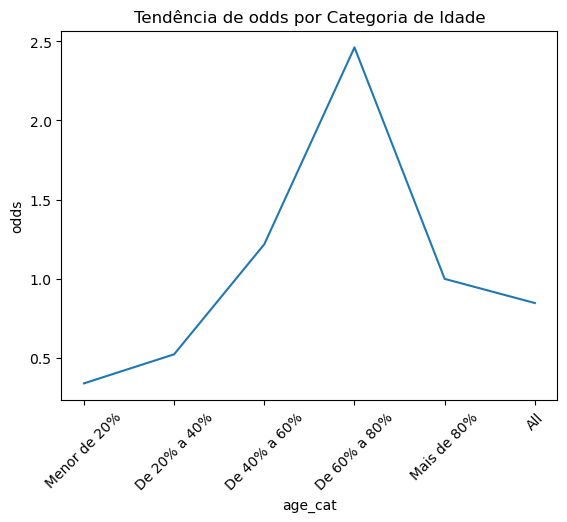

In [33]:


# Defina a variável a ser utilizada no eixo x (categórica)
var_x = 'age_cat'

# Defina a variável a ser utilizada no eixo y (numérica)
var_y = 'odds'  # Para odds ou 'log_odds' para log odds

# Obtenha os dados para o gráfico
dados_x = tab_age.index.to_numpy()
dados_y = tab_age[var_y].to_numpy()

# Crie o gráfico de linha
plt.plot(dados_x, dados_y)

# Defina os rótulos dos eixos
plt.xlabel(var_x)
plt.ylabel(var_y)

# Defina o título do gráfico
plt.title(f'Tendência de {var_y} por Categoria de Idade')

# Gire os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)

# Mostre o gráfico
plt.show()

In [35]:
# Obtenha os valores de WOE
dados_woe = tab_age[var_y].to_numpy()

# Inicialize a lista de acumulados
acumulados = [0]

# Calcule os acumulados
for i in range(len(dados_woe) - 1):
  acumulados.append(acumulados[i] + dados_woe[i + 1])

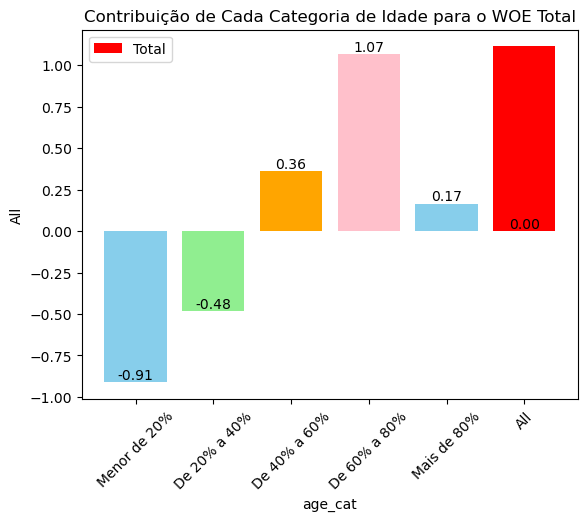

In [50]:
# Cores para as barras
cores_barras = ['skyblue', 'lightgreen', 'orange', 'pink']

# Cor para o total
cor_total = 'red'

# Crie a figura e o eixo
fig, ax = plt.subplots()

# barras
barras = ax.bar(dados_x, dados_woe, color=cores_barras)

# barra do total
barra_total = ax.bar(dados_x[-1], acumulados[-1], color=cor_total, label='Total')

# Adicione rótulos aos valores das barras
for i, barra in enumerate(barras):
  altura = barra.get_height()
  ax.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}', ha='center', va='bottom')


# Defina os rótulos dos eixos
plt.xlabel(var_x)
plt.ylabel(var_y)

# Defina o título do gráfico
plt.title('Contribuição de Cada Categoria de Idade para o WOE Total')

# Gire os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)

# Adicione legenda
plt.legend()

# Mostre o gráfico
plt.show()
